In [1]:
import tensorflow as tf
from results.samuel.MobileNetV2_AddTranspose.custom import *
model_paths = ['results\samuel\MobileNetV2_MC_AddTranspose\model.tf','results\samuel\MobileNetV2_MC_AddUpsampling\model.tf','results\samuel\MobileNetV2_MC_AddDropout\model.tf','results\samuel\MobileNetV2_MC_KerasModel\model.tf']
from load_data import CustomDataGenerator
import time
from matplotlib.pyplot import savefig

In [2]:
img_dir = "PredImages/"
mask_dir = "PredLabels/"
batch_size=6
train, validation = CustomDataGenerator.generate_data(batch_size, img_dir, mask_dir,horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed, single_img=False)
images, masks = train.__getitem__(2)

Number of samples:  216
Classes: [  0. 142. 255.]
Number of samples:  24
Classes: [  0. 142. 255.]


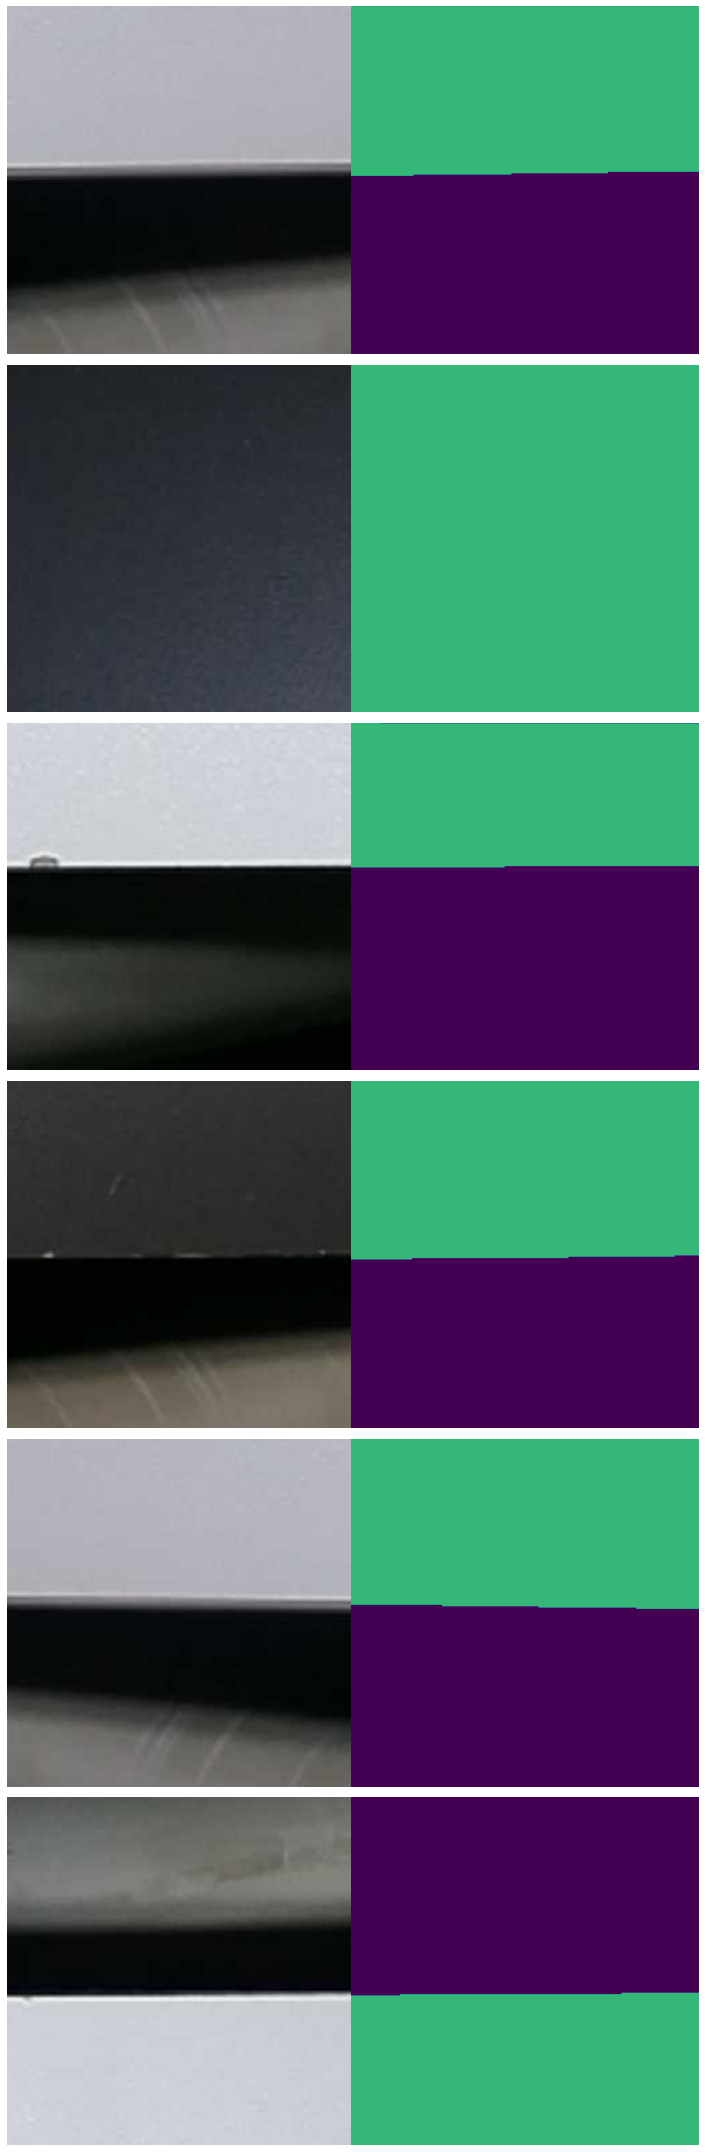

In [3]:
#Find a meaningful batch with difficult examples (best: no complete full or empty masks)
#in 5er batches: batch 2,4,6,7,8
#train.plot_batch(8)

In [4]:
model_AddTranspose = tf.keras.models.load_model(model_paths[0])
model_AddUpsampling = tf.keras.models.load_model(model_paths[1])
model_AddDropout = tf.keras.models.load_model(model_paths[2])
model_KerasModel = tf.keras.models.load_model(model_paths[3])

In [5]:
T1 = time.time()
preds_AddTranspose = model_AddTranspose.predict(x=images, verbose=1)
T2 = time.time()
preds_AddUpsampling = model_AddUpsampling.predict(x=images, verbose=1)
T3 = time.time()
preds_AddDropout = model_AddDropout.predict(x=images, verbose=1)
T4 = time.time()
preds_KerasModel = model_KerasModel.predict(x=images, verbose=1)
T5 = time.time()
print("Time for AddTranspose: "+str(round(T2-T1,3))+" sec. \n")
print("Time for AddUpsampling: "+str(round(T3-T2,3))+" sec. \n")
print("Time for AddDropout: "+str(round(T4-T3,3))+" sec. \n")
print("Time for KerasModel: "+str(round(T5-T4,3))+" sec. \n")


1/1 [==============================] - 2s 2s/step
Time for AddTranspose: 2.432 sec. 

Time for AddUpsampling: 1.55 sec. 

Time for AddDropout: 2.479 sec. 

Time for KerasModel: 2.262 sec. 



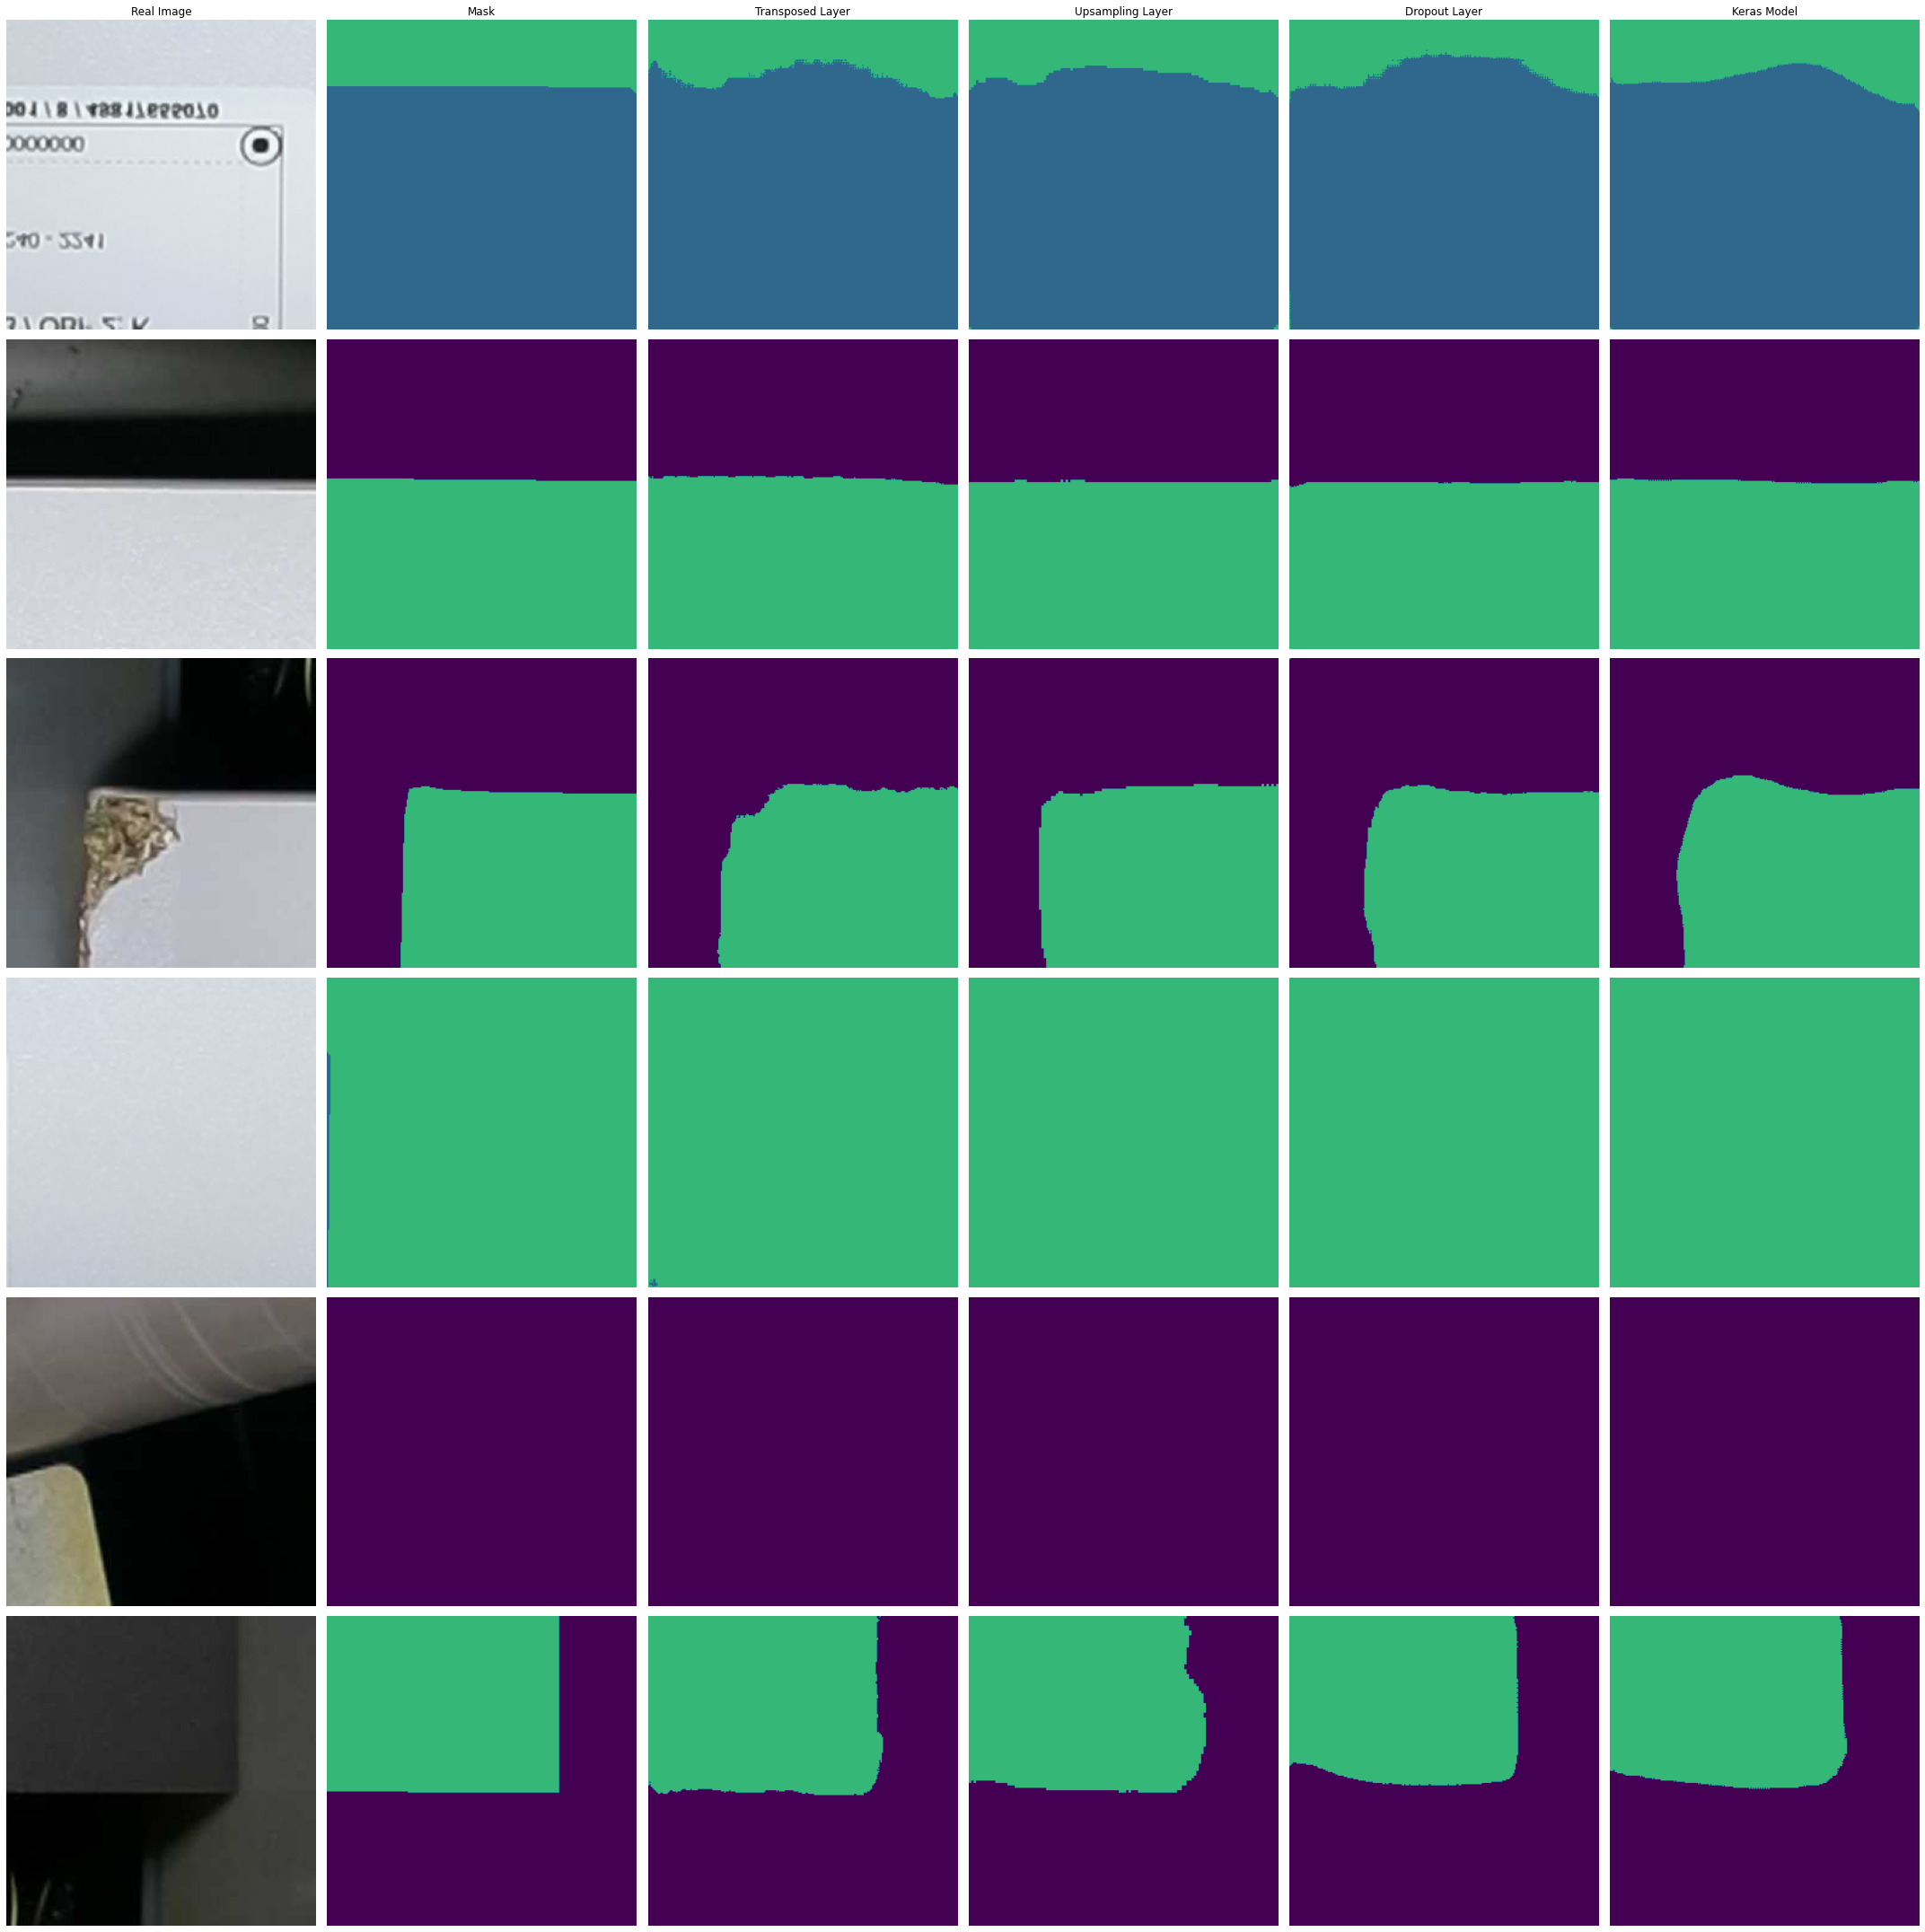

In [6]:
#batches: 2,4,6,7,8
fig = train.plot_several_prediction(2, preds_AddTranspose, preds_AddUpsampling, preds_AddDropout, preds_KerasModel)
fig.savefig("results\samuel\PredictPlot-AllAddedLayersModels_MC_batch2.png")
fig.savefig("results\samuel\PredictPlot-AllAddedLayersModels_MC_batch2.pdf")